In [6]:
__author__ = 'Security'
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt


Рассмотрим функцию $$p(x) = \frac{5}{x^6}I_{[1, +\infty)}$$ Это, очевидно, плотность некоторого распределения, поскольку $$\int_{1}^{+\infty}p(x)dx = 1.$$ Расмотрим случайную величину $\xi$ имеющую такую плотность.
$$\mathbb{E}\xi^4 = \int_{1}^{+\infty}\frac{5x^4}{x^6}dx = 5$$
$$\mathbb{E}\xi^5 = \int_{1}^{+\infty}\frac{5x^5}{x^6}dx = \int_{1}^{+\infty}\frac{5}{x}dx \longrightarrow \infty$$


In [3]:
class distGen(stats.rv_continuous):
    def _pdf(self, x):
        return 5. / float(x ** 6)
f5sampleGenerator = distGen(a=1, name='finite 5 moment distribution')

In [12]:
N = 10000
sample = f5sampleGenerator.rvs(size=N) #генерируем выборку

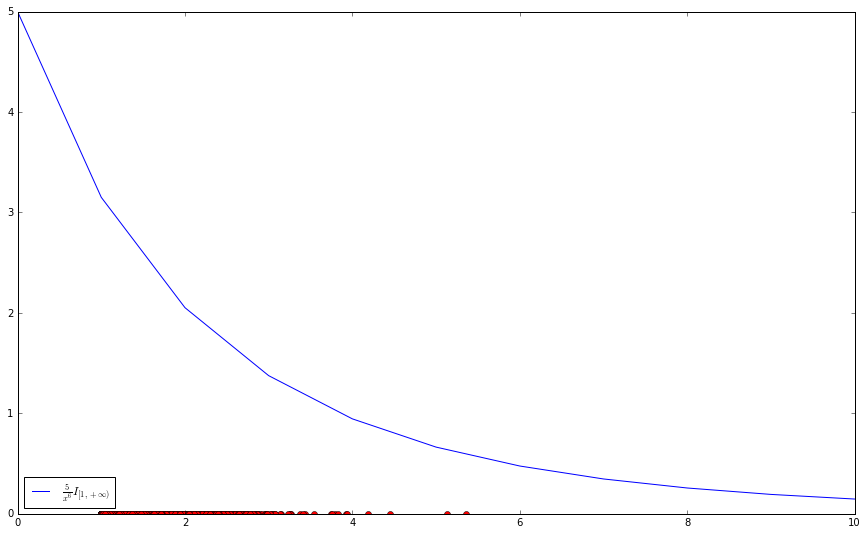

In [15]:
plt.figure(figsize=(15, 9))
a = [5 / (float((x/100.0) ** 6)) for x in range(100, 100000, 8)]
plt.xlim(0, 10)
plt.plot(np.array(a), label=r'$\frac{5}{x^6}I_{[1, +\infty)}$')
plt.plot(sample, [0 for _ in range(len(sample.tolist()))], 'ro')
plt.legend(loc='best')
plt.show()

Несложно понять чему равна дисперсия:

In [16]:
despersion = 5/3. - 25/16.

In [17]:
def meanSrt(s, n):
    return (s[:n+1] ** 2).mean()
def srtMean(s, n):
    return (s[:n+1].mean() ** 2)
def getDataForPlot(s):
    return [abs(meanSrt(s, n) - srtMean(s, n) - despersion) for n in range(1, N)]

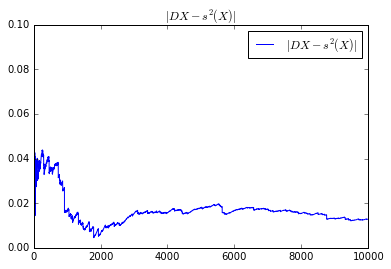

In [23]:
plt.title(r'$|DX - s^2(X)|$')
plt.plot(getDataForPlot(sample), label=r'$|DX - s^2(X)|$')
plt.legend(loc='best')
plt.ylim(0, 0.1)
plt.show()

In [29]:
cauchySample = stats.cauchy.rvs(size=N)

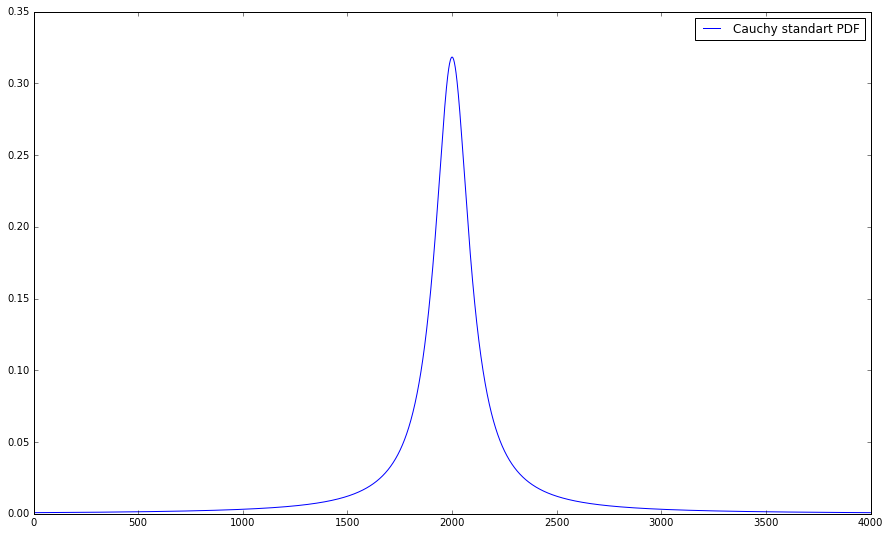

In [42]:
plt.figure(figsize=(15, 9))
plt.plot([stats.cauchy.pdf(x) for x in np.arange(-20, 20, 0.01)], label=r'Cauchy standart PDF')
plt.legend(loc='best')
plt.show()

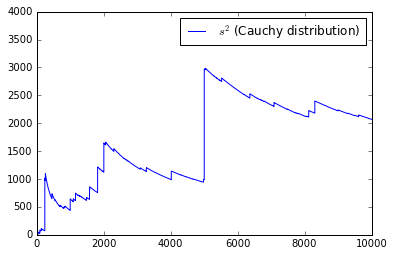

In [37]:
res = [(cauchySample[:n+1] ** 2).mean() - cauchySample[:n+1].mean() ** 2 for n in range(N)]

plt.plot(res, label=r'$s^2$ (Cauchy distribution)')
plt.ylim(0, 4000)
plt.legend(loc='best')
plt.show()
